importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.tree import DecisionTreeRegressor


In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

In [5]:
df.head()#ICECREAM SHOP DATA

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


#PROBLEM STATEMENT:
In this data, we have one independent variable 'Temperature' and one dependent variable 'Revenue'. You have to build a DecisionTreeRegressor to study the relationship b/w the two variables of the Ice Cream Shop and then predict the revenue for the ice cream shop based on the temperature on a particular data

In [6]:
df.tail()# we have total 500 datapoints i.e 0-499

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [9]:
df.isnull().sum()#no null values

,0
Temperature,0
Revenue,0


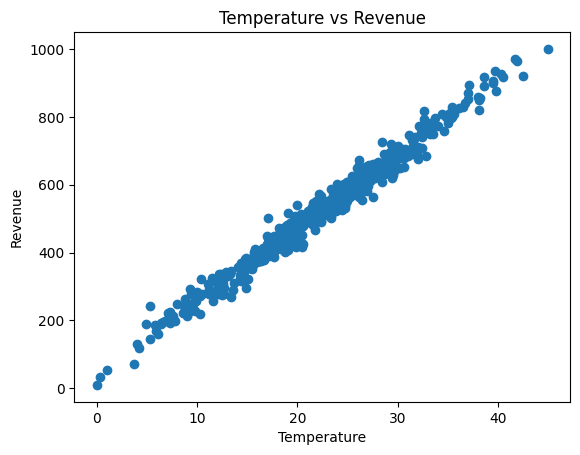

In [10]:
plt.scatter(df['Temperature'],df['Revenue'])
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temperature vs Revenue')
plt.show()# we can see a positive correlation as temp increases revenue increases

In [11]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


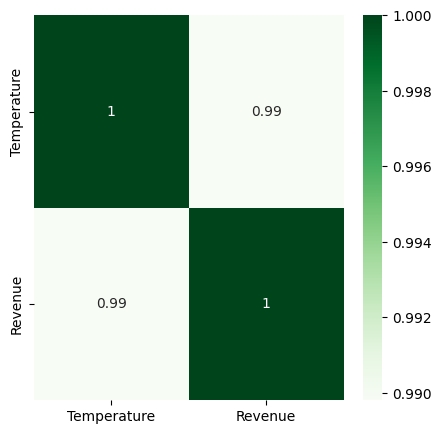

In [15]:
# if we want to see correaltion visually then we can use "heatmap"
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()
#

# THIS MEANS WHEN THE TEMPERATURE IS HIGH THEN HIS PROFIT (REVENUE) IS ALSO INCREASED

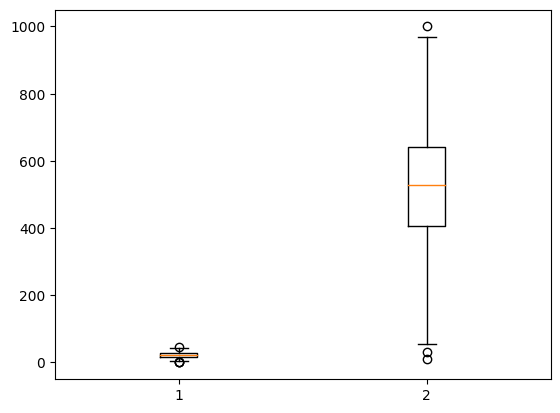

In [16]:
# shows strong positive correalation nearly to 1 i.e 0.99
plt.boxplot(df)
plt.show()# black circular rings are called as outliers

machine learning
training and testing data splitting

In [17]:
x=np.array(df['Temperature']).reshape(-1,1)
y=np.array(df['Revenue']).reshape(-1,1)


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
len(x_train)

400

In [21]:
len(x_test)

100

In [22]:
len(y_train)

400

In [23]:
len(y_test)

100

choosing the model

In [24]:
regressor=DecisionTreeRegressor()

In [25]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

#testing the model

In [26]:
y_pred=regressor.predict(x_test)

comparing the actual values and predicted values

In [27]:
comp=pd.DataFrame({'Actual':y_test.reshape(-1),'Predicted':y_pred.reshape(-1)})

In [28]:
comp

,Actual,Predicted
0,321.848273,316.240194
1,628.453211,665.672676
2,581.074005,643.648601
3,563.250987,574.710649
4,570.990932,542.608070
...,...,...
95,608.629992,550.701404
96,704.281439,690.789296
97,460.402500,448.471335
98,440.677829,413.914067


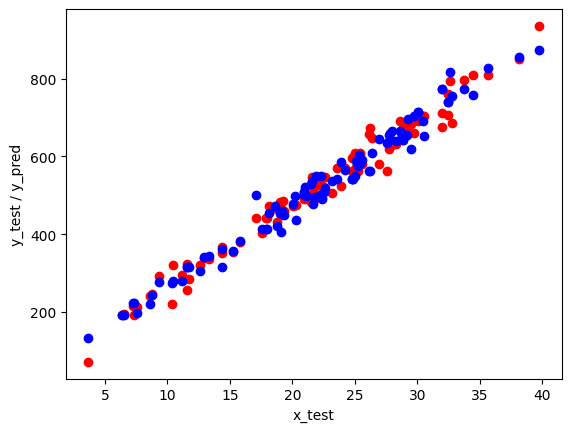

In [31]:
plt.scatter(x_test,y_test,color='red')
plt.scatter(x_test,y_pred,color='blue')
plt.xlabel('x_test')
plt.ylabel('y_test / y_pred')
plt.show()

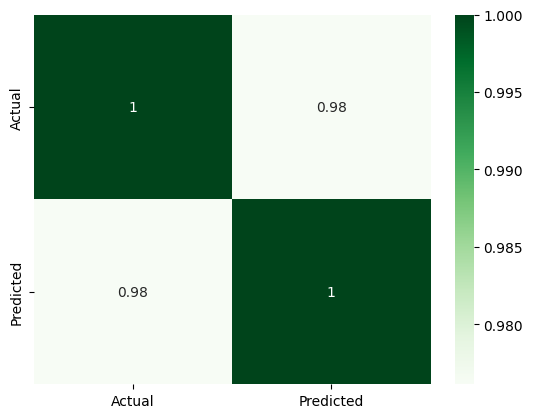

In [32]:
# now compare y_test and y_train values visually
sns.heatmap(comp.corr(),annot=True,cmap='Greens')
plt.show()


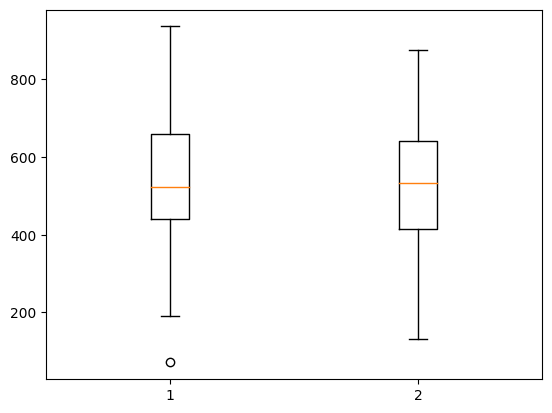

In [33]:
# outliers? see and check in boxplot
plt.boxplot(comp)
plt.show()


checking performance

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [35]:
r2_score(y_test,y_pred) #95 % accuracy

0.9525125682223085

In [36]:
mse=mean_squared_error(y_test,y_pred)

In [37]:
mse

1346.6346765974515

In [38]:
mae=mean_absolute_error(y_test,y_pred)
mae

28.711504345899996

# A  MODEL IS SAID TO BE CHOOSEN PERFECTLY IF AND ONLY IF IT IS COMPARED WITH ANOTHER MODELS ACCURACIES ,IF OTHER MODEL SHOWS HIGHER ACCURACY THEN IT IS SAD TO BE A PERFECT CHOOSEN MODEL


In [39]:
regressor.score(x_test,y_test)

0.9525125682223085